# SOHO | LASCO

In [1]:
import os
#define the path where you want the files to be downloaded
path = os.path.expanduser('~/Desktop/corkit_examples')

In [2]:
#turn on automagic (if says OFF rerun this cell)
%automagic


Automagic is OFF, % prefix IS needed for line magics.


## Downloading data

In [3]:
from corkit.lasco import downloader
from datetime import datetime

#Give a tuple with datetime values, doesn't expect resolutions higher than days.
interval_time = [(
    datetime(2003, 10, 20),
    datetime(2003, 10, 30)
)]

lasco_down = downloader('c2', root = path) #C2 coronagraph

await lasco_down(interval_time)

lasco_down = downloader('c3', root = path) #C3 coronagraph

/usr/lib/python3/dist-packages/paramiko/transport.py:237: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
#c2 coronagraph
sorted(list(filter(lambda x: '20031028' in x, os.listdir(os.path.join(path, 'c2')))))

['20031028_000606.fits',
 '20031028_003005.fits',
 '20031028_005405.fits',
 '20031028_013145.fits',
 '20031028_015405.fits',
 '20031028_020605.fits',
 '20031028_023006.fits',
 '20031028_025405.fits',
 '20031028_030605.fits',
 '20031028_033005.fits',
 '20031028_035405.fits',
 '20031028_040605.fits',
 '20031028_043005.fits',
 '20031028_045405.fits',
 '20031028_050605.fits',
 '20031028_053005.fits',
 '20031028_055405.fits',
 '20031028_060605.fits',
 '20031028_063005.fits',
 '20031028_065405.fits',
 '20031028_073143.fits',
 '20031028_075405.fits',
 '20031028_080605.fits',
 '20031028_083005.fits',
 '20031028_085405.fits',
 '20031028_090605.fits',
 '20031028_093005.fits',
 '20031028_095405.fits',
 '20031028_100606.fits',
 '20031028_103021.fits',
 '20031028_105405.fits',
 '20031028_110605.fits',
 '20031028_113005.fits',
 '20031028_115405.fits',
 '20031028_120607.fits',
 '20031028_123005.fits',
 '20031028_125405.fits',
 '20031028_133157.fits',
 '20031028_135546.fits',
 '20031028_140749.fits',


In [5]:
#c3 coronagraph
sorted(list(filter(lambda x: '20031028' in x, os.listdir(os.path.join(path, 'c3')))))

['20031028_001805.fits',
 '20031028_004205.fits',
 '20031028_014205.fits',
 '20031028_021807.fits',
 '20031028_024205.fits',
 '20031028_031805.fits',
 '20031028_034205.fits',
 '20031028_041805.fits',
 '20031028_044206.fits',
 '20031028_051806.fits',
 '20031028_054205.fits',
 '20031028_061805.fits',
 '20031028_064206.fits',
 '20031028_074205.fits',
 '20031028_081805.fits',
 '20031028_084205.fits',
 '20031028_091805.fits',
 '20031028_094205.fits',
 '20031028_101032.fits',
 '20031028_102002.fits',
 '20031028_104205.fits',
 '20031028_111807.fits',
 '20031028_114205.fits',
 '20031028_121805.fits',
 '20031028_124207.fits',
 '20031028_134348.fits',
 '20031028_141959.fits',
 '20031028_145249.fits',
 '20031028_155047.fits',
 '20031028_162750.fits',
 '20031028_172920.fits',
 '20031028_180709.fits',
 '20031028_190850.fits',
 '20031028_194703.fits',
 '20031028_204917.fits',
 '20031028_212754.fits',
 '20031028_232026.fits']

## Calibrating data

In [6]:
from corkit.lasco import level_1

file = os.path.join(path, 'c2', '20031028_125405.fits')

img, header = level_1(
    file, 
    os.path.join(path, 'prueba.fits') #saves the file here
)

Importing data
LASCO-C2:22157677.fts:2003/10/28T12:54:05.521...


2003-10-28T12:53:59.512


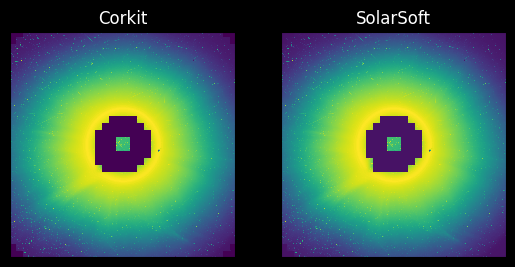

In [7]:
from astropy.visualization import HistEqStretch, ImageNormalize
import matplotlib.pyplot as plt
from corkit.utils import FITS
import numpy as np
import matplotlib
import copy
import os
#official level 1 (SolarSoft)
img1 , header1 = FITS('docs/examples/25157677.fits')
print(header1['date-obs'])
def prepare_img(img):
    finite_data = img[np.isfinite(img)]
    norm = ImageNormalize(stretch=HistEqStretch(finite_data))
    return norm

norm = prepare_img(img)
norm1 = prepare_img(img1)

#plot
fig, ax = plt.subplots(1, 2)
cmap = copy.copy(matplotlib.colormaps['gray'])
cmap.set_bad(color='red')

# For CorKit
im1 = ax[0].imshow(img, norm=norm, interpolation='nearest', origin='lower')
ax[0].set(title='Corkit')
ax[0].set_facecolor('black')  
ax[0].set_xticks([])  
ax[0].set_yticks([]) 

# For Solarsoft
im2 = ax[1].imshow(img1, norm=norm1, interpolation='nearest', origin='lower')
ax[1].set(title='SolarSoft')
ax[1].set_facecolor('black') 
ax[1].set_xticks([])  
ax[1].set_yticks([])  

fig.patch.set_facecolor('black')

for axis in ax:
    axis.title.set_color('white')

plt.savefig('docs/examples/c2.png', facecolor='black', bbox_inches='tight')

plt.show()

## Studying CMEs

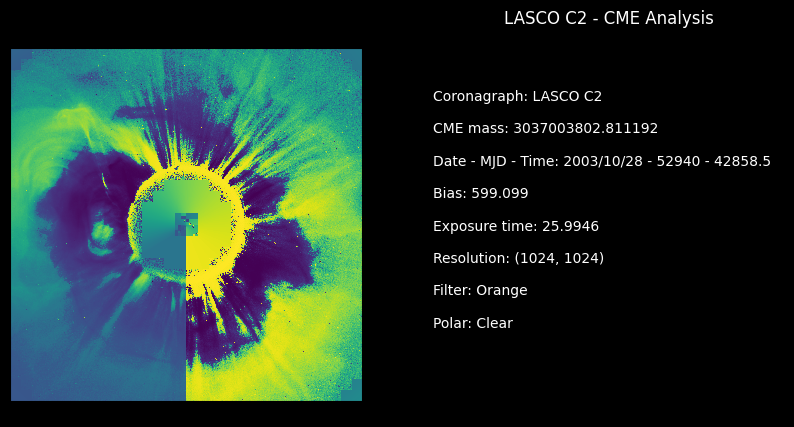

In [8]:
from corkit.lasco import CME
from astropy.io import fits

cme_analysis = CME()

bn = os.path.join(path, 'c2', '20031028_113005.fits')
fn = os.path.join(path, 'c2', '20031028_115405.fits')

## We need a base img and final image to compute the mass of the CME
mass_img = cme_analysis.mass(bn, fn, ALL = True)

cme_analysis.plot(mass_img, fits.getheader(fn))

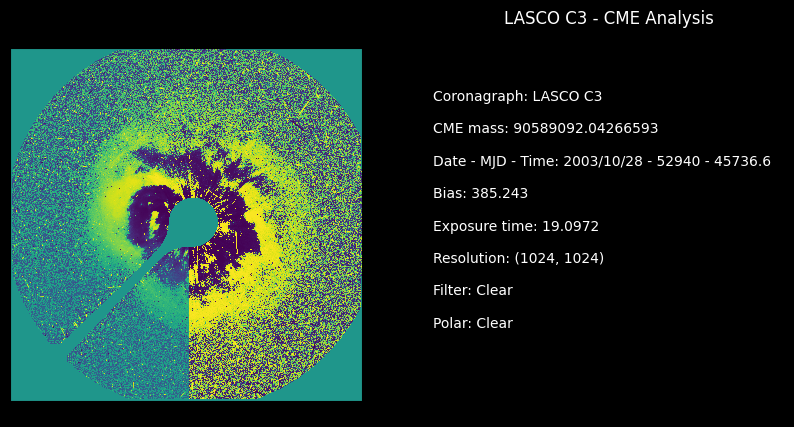

In [9]:
bn = os.path.join(path, 'c3', '20031028_121805.fits')
fn = os.path.join(path, 'c3', '20031028_124207.fits')

mass_img = cme_analysis.mass(bn, fn, ALL = True)

cme_analysis.plot(mass_img, fits.getheader(fn))

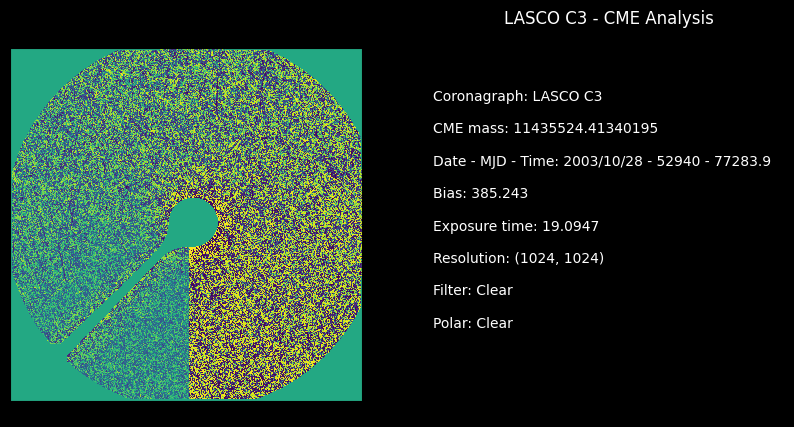

In [10]:
bn = os.path.join(path, 'c3', '20031028_204917.fits')
fn = os.path.join(path, 'c3', '20031028_212754.fits')

mass_img = cme_analysis.mass(bn, fn, ALL = True)

cme_analysis.plot(mass_img, fits.getheader(fn))